In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Misc
import warnings
import tensorflow as tf
import keras 
warnings.filterwarnings('ignore')

print(sys.version)
print(os.path)
print("Keras: ",keras.__version__)
print("TF: ",tf.__version__)
print("\n\nYou are good to go")

#
from approximator import *
from q_learning_nn import *
from evaluation import *

#import environment
sys.path.append(r'../virl')
import virl



3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
<module 'posixpath' from '/Users/wayenvan/opt/anaconda3/lib/python3.8/posixpath.py'>
Keras:  2.4.3
TF:  2.3.1


You are good to go


## Training phase
define some properities

In [2]:
#create training environment, I am using P1
env_train = virl.Epidemic(stochastic=True, noisy=True) 

d_states = env_train.observation_space.shape[0]
n_actions = env_train.action_space.n

alpha = 0.001
nn_config = [36,36,36]
BATCH_SIZE = 20
BUFFER_SIZE = 10000

start training

In [39]:

# Init the tow networks
nn_func_approximator = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)
nn_func_approximator_target = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)

# Training   
stats = q_learning_nn(env_train,nn_func_approximator, nn_func_approximator_target, 5000, max_steps_per_episode=200, 
                      epsilon_init=0.5, epsilon_decay=0.995, epsilon_min=0.001, fn_model_out=r"./data/cartpole_temp.h5")

episode: 199/200, score: 51, epsilon: 0.001

In [41]:
#save stats
stats_storage = Stats_storage(stats)
save_variable(stats_storage, "./data/stats_train")

review the process

In [42]:
s = load_variable("./data/stats_train")

In [49]:
c = np.mean(np.resize(s.episode_rewards, [200//5,5]), axis=1)

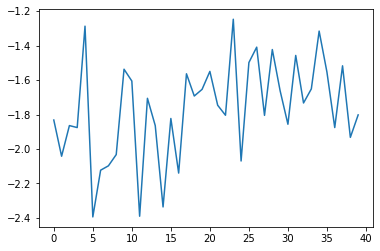

In [50]:
plt.plot(c)